# Capstone Project IBM - Data Science: Final Assignment

## The best location where to open a *Frites Atelier* in Firenze, Italia

The aim of this project is to determine the optimal location where to start a *Frites Atelier* business in Florence through some of the Data Science methods and strategies explained in the *IBM Data Science - Professional Certificate*.

### Process Descrption:

-  Sort out longitude, latitude and location values and convert them into a dataframe.
-  Concerning the specifications of the Neighborhoods, I will scrap data from the Wikipedia pagehttps://it.wikipedia.org/wiki/Quartieri_di_Firenze and https://www.firenzetoday.it/guida/casa/prezzo-case-vendita-citta-quartiere.html . Moreover, it essential to point out that Florence is divided by *Quartieri* (Neighborhoods) and *Suddivisioni* or *Circoscrizioni* (Districts).
-  Foursquare API will be used to get data related to venues, resturants related peculariaties.
-  Folium library will be used for visualize geospatial data. At the end, the final bar chart will show 5 clusters grouped by the paramenters found: in the report will be discussed their suitability for running the kind of business investigated in this project.

## Project Development 

In [3]:
# 1.1 install and import libraries
!pip install geopy
!pip install folium
!pip install geocoder
!pip install wordcloud

     |████████████████████████████████| 94 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 366 kB 14.0 MB/s eta 0:00:01


In [4]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import geocoder
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize

# 1.2 importing matplotlib and associates

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# 1.3 importing from scikit-learn the necessary library for Clustering and Agglomeration

from sklearn.cluster import KMeans
import folium
from folium import plugins
from folium.plugins import HeatMap

# 1.4 I am going to  the BS library for scraping the Wikipedia webpage

from bs4 import BeautifulSoup

print ('libraries import => done')

libraries import => done


In [5]:
# 1.5 sorting out the geographical coordinates of Firenze, Italia

firenze_address = 'Firenze, Italia'

geolocator = Nominatim(user_agent= "firenze_explorer")
location = geolocator.geocode(firenze_address)
latitude = location.latitude
longitude = location.longitude
firenze_center = [latitude, longitude ]
print('The geocoordinates of {} are {}, {}.'.format(firenze_address, latitude, longitude))

# 1.6 coordinates are lat. 43.7698712 and long. 11.2555757 


The geocoordinates of Firenze, Italia are 43.7698712, 11.2555757.


In [6]:
# 1.7 Dataframe scraping and cleaning 

wiki = 'https://it.wikipedia.org/wiki/Quartieri_di_Firenze'
wikipedia_page = requests.get(wiki)
df_raw = pd.read_html(wikipedia_page.content, header=0)[0]
df_raw.head()

,Quartiere,Superficie(km²),Abitanti(5/06),Densità(ab/km²),Presidente,Suddivisioni
0,Quartiere 1 Centro Storico,11396,67.170,5.894,Maurizio Sguanci (PD),Centro Storico · Il Prato · Fortezza da Basso ...
1,Quartiere 2 Campo di Marte,23406,88.588,3.784,Michele Pierguidi (PD),Campo di Marte · Le Cure · Viali · Bellariva ·...
2,Quartiere 3 Gavinana-Galluzzo,22312,40.907,1.833,Serena Perini (PD),Gavinana · Galluzzo · San Gaggio · Collina sud...
3,Quartiere 4 Isolotto-Legnaia,16991,66.636,3.921,Mirko Dormentoni (PD),Isolotto · Legnaia · Argingrosso · Cintoia · I...
4,Quartiere 5 Rifredi,28171,103.761,3.683,Cristiano Balli (PD),Statuto · Romito · Viali · Fortezza da Basso ·...


In [7]:
df_raw = df_raw.drop(['Superficie(km²)','Densità(ab/km²)','Presidente'], axis=1)
df_raw.head()

,Quartiere,Abitanti(5/06),Suddivisioni
0,Quartiere 1 Centro Storico,67.170,Centro Storico · Il Prato · Fortezza da Basso ...
1,Quartiere 2 Campo di Marte,88.588,Campo di Marte · Le Cure · Viali · Bellariva ·...
2,Quartiere 3 Gavinana-Galluzzo,40.907,Gavinana · Galluzzo · San Gaggio · Collina sud...
3,Quartiere 4 Isolotto-Legnaia,66.636,Isolotto · Legnaia · Argingrosso · Cintoia · I...
4,Quartiere 5 Rifredi,103.761,Statuto · Romito · Viali · Fortezza da Basso ·...


In [8]:
df_raw.rename(columns={'Quartiere':'Neighborhoods', 'Abitanti(5/06)':'Population', 'Suddivisioni':'Districts'}, inplace=True)
df_raw.head()

,Neighborhoods,Population,Districts
0,Quartiere 1 Centro Storico,67.170,Centro Storico · Il Prato · Fortezza da Basso ...
1,Quartiere 2 Campo di Marte,88.588,Campo di Marte · Le Cure · Viali · Bellariva ·...
2,Quartiere 3 Gavinana-Galluzzo,40.907,Gavinana · Galluzzo · San Gaggio · Collina sud...
3,Quartiere 4 Isolotto-Legnaia,66.636,Isolotto · Legnaia · Argingrosso · Cintoia · I...
4,Quartiere 5 Rifredi,103.761,Statuto · Romito · Viali · Fortezza da Basso ·...


In [9]:
df_raw=df_raw[['Neighborhoods','Districts','Population']]
df_raw.head()


,Neighborhoods,Districts,Population
0,Quartiere 1 Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170
1,Quartiere 2 Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588
2,Quartiere 3 Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907
3,Quartiere 4 Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636
4,Quartiere 5 Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761


In [10]:
df_raw = {'Neighborhoods': ['Quartiere 1 Centro Storico','Quartiere 2 Campo di Marte','Quartiere 3 Gavinana-Galluzzo','Quartiere 4 Isolotto-Legnaia','Quartiere 5 Rifredi'],
        'Districts': ['Centro Storico · Il Prato · Fortezza da Basso · Viali · San Jacopino · Collina sud · San Gaggio', 'Campo di Marte · Le Cure · Viali · Bellariva · Coverciano · Settignano · Collina nord','Gavinana · Galluzzo · San Gaggio · Collina sud · Sorgane · Bandino · Paradiso · San Marcellino','Isolotto · Legnaia · Argingrosso · Cintoia · I Bassi · La Casella · Le Torri · Mantignano · Monticelli · Pignone · San Lorenzo a Greve · Soffiano · San Quirico · Torcicoda · Ugnano','Statuto · Romito · Viali · Fortezza da Basso · Rifredi · Careggi · Castello · Collina nord · Novoli · Firenze Nova · Brozzi · Le Piagge · Peretola · Quaracchi · Ponte di mezzo'],
        'Population': [67.170,88.588,40.907,66.636,103.761]}


df_raw = pd.DataFrame(df_raw, index=['0', '1', '2', '3', '4'])
df_raw.Neighborhoods = ['Centro Storico','Campo di Marte', 'Gavinana-Galluzzo','Isolotto-Legnaia', 'Rifredi']
df_raw.head()
print('There are 5 Neighborhoods in Firenze and the most populated one is Quartiere 5 Rifredi with 103.761 people')
df_raw.head()

There are 5 Neighborhoods in Firenze and the most populated one is Quartiere 5 Rifredi with 103.761 people


,Neighborhoods,Districts,Population
0,Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170
1,Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588
2,Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907
3,Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636
4,Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761


In [11]:
# 1.8 geolocalization of the Neighborhoods

def get_latlng(neighborhood):       # 1.9 looping until the coordinates will be found
    lat_lng_geoloc = None
    while(lat_lng_geoloc is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,firenze_address))
        lat_lng_geoloc = g.latlng
    return lat_lng_geoloc

geoloc = [ get_latlng(neighborhood) for neighborhood in df_raw["Neighborhoods"].tolist()]
df_geoloc = pd.DataFrame(geoloc, columns=['Latitude', 'Longitude'])
df_geoloc


,Latitude,Longitude
0,43.76941,11.25900
1,43.78149,11.28196
2,43.74656,11.25732
3,43.77399,11.19830
4,43.80260,11.21329


In [12]:
# 2.0 merging dataframes

df_geoloc = np.array([43.76941,43.78149,43.74656,43.77399,43.80260])
df_geoloc
df_raw['Latitude'] = df_geoloc

df_geoloc = np.array([11.25900,11.28196,11.25732,11.19830,11.21329])
df_geoloc
df_raw['Longitude'] = df_geoloc
df_raw

,Neighborhoods,Districts,Population,Latitude,Longitude
0,Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170,43.76941,11.25900
1,Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588,43.78149,11.28196
2,Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907,43.74656,11.25732
3,Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636,43.77399,11.19830
4,Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761,43.80260,11.21329


In [13]:
# 2.1 visualize a map of Firenze with the neighborhoods locations 

map_firenze= folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng,  neighborhood in zip(df_raw['Latitude'], df_raw['Longitude'], df_raw['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=16,
        popup=label,
        color='red',
        fill=True,
        fill_color='#F2F22D',
        fill_opacity=0.7,
        parse_html=False).add_to(map_firenze)  
    
map_firenze

In [14]:
# 2.2 Foursquare API analysis for Neighborhoods (Quartieri)

CLIENT_ID = 'MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO'
CLIENT_SECRET = '0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2'
ACCESS_TOKEN = 'O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


address = 'Quartiere 1, Firenze, Italia'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


search_query = 'Ristorante'
radius = 1500
print(search_query + ' .... OK!')


url = 'https://api.foursquare.com/v2/venues/search?={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url


Your credentails:
CLIENT_ID: MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO
CLIENT_SECRET:0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2
43.7692631 11.254821533849798
Ristorante .... OK!


'https://api.foursquare.com/v2/venues/search?=MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO&client_secret=0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2&ll=43.7692631,11.254821533849798&oauth_token=O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M&v=20180604&query=Ristorante&radius=1500&limit=30'

In [15]:
results = requests.get(url).json()
results

venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Mammamia - Ristorante Pizzeria,Restaurant,"Piazza del Mercato Nuovo, 18/R",43.769940,11.254040,"[{'label': 'display', 'lat': 43.76994, 'lng': ...",98,50123,IT,Firenze,Toscana,Italia,"[Piazza del Mercato Nuovo, 18/R, 50123 Firenze...",NaN,NaN,59532064464d65663221116b
1,Ristorante Santa Felicita,Italian Restaurant,Piazza Santa Felicita 5r,43.767157,11.252392,"[{'label': 'display', 'lat': 43.76715653566903...",305,NaN,IT,Firenze,Toscana,Italia,"[Piazza Santa Felicita 5r, Firenze Toscana, It...",NaN,NaN,4e5b909a8877c8a76e006da3
2,Pizzeria Ristorante Uffizi,Pizza Place,Piazza Castellani,43.768571,11.256585,"[{'label': 'display', 'lat': 43.76857084230686...",161,50122,IT,Firenze,Toscana,Italia,"[Piazza Castellani, 50122 Firenze Toscana, Ita...",NaN,NaN,4d6e390c2427224b5ffbc94d
3,Ristorante Moyé - Firenze,Italian Restaurant,Via del Parione 16,43.770772,11.249549,"[{'label': 'display', 'lat': 43.77077230009948...",455,50126,IT,Firenze,Toscana,Italia,"[Via del Parione 16 (""angolo via dei Tornabuon...","""angolo via dei Tornabuoni""",NaN,51643a677043c6287386f257
4,Ristorante Regginella,Italian Restaurant,Via del Canto dei Nelli 38/r,43.775181,11.253262,"[{'label': 'display', 'lat': 43.7751812119671,...",670,50100,IT,Firenze,Toscana,Italia,"[Via del Canto dei Nelli 38/r (Via Faenza), 50...",Via Faenza,NaN,4d8244ae2ad9a143e6238428
5,"Ristorante Cinese, Capitale Della Cina",Chinese Restaurant,Largo F.lli Alinari 12-13,43.776269,11.250448,"[{'label': 'display', 'lat': 43.7762685549939,...",855,50123,IT,Firenze,Toscana,Italia,"[Largo F.lli Alinari 12-13, 50123 Firenze Tosc...",NaN,NaN,4ce83503f8653704a40cafc4
6,Ristorante Buca Poldo,Italian Restaurant,"Chiasso degli Armagnati, 2/R",43.769440,11.254550,"[{'label': 'display', 'lat': 43.76944, 'lng': ...",29,50122,IT,Firenze,Toscana,Italia,"[Chiasso degli Armagnati, 2/R, 50122 Firenze T...",NaN,NaN,4bcdeb93937ca593e792ad92
7,Ristorante Maso,Italian Restaurant,"Via M. Finiguerra, 10",43.773450,11.244730,"[{'label': 'display', 'lat': 43.77345, 'lng': ...",935,50123,IT,Firenze,Toscana,Italia,"[Via M. Finiguerra, 10, 50123 Firenze Toscana,...",NaN,NaN,4c8bd3c58018a1cd96d7e6d2
8,Ristorante Giapponese Il Cuore,Restaurant,"Via Romana, 123/R",43.762000,11.242960,"[{'label': 'display', 'lat': 43.762, 'lng': 11...",1250,50125,IT,Firenze,Toscana,Italia,"[Via Romana, 123/R, 50125 Firenze Toscana, Ita...",NaN,NaN,59059d1612c8f05bcafa48d6
9,Ristorante Bargello,Italian Restaurant,Piazza della Signoria,43.769510,11.255264,"[{'label': 'display', 'lat': 43.76950968157254...",44,50122,IT,Firenze,Toscana,Italia,"[Piazza della Signoria (Via Vacchereccia), 501...",Via Vacchereccia,NaN,53514560498e82cb0898f853


In [16]:
# 2.3 Analysis for the first Neighborhood - Centro Storico

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    
venues_map


In [17]:
print('There are {} Restaurant places located in Centro Storico Neighborhood.'.format(len(dataframe_filtered['name'].unique())))

There are 30 Restaurant places located in Centro Storico Neighborhood.


In [18]:
# 2.4 Analysis of the second Neighborhood - Campo di Marte

CLIENT_ID = 'MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO'
CLIENT_SECRET = '0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2'
ACCESS_TOKEN = 'O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


address = 'Quartiere 2, Firenze, Italia'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.78149
longitude = 11.28196
print(latitude, longitude)


search_query = 'Ristorante'
radius = 800
print(search_query + ' .... OK!')


url = 'https://api.foursquare.com/v2/venues/search?={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

Your credentails:
CLIENT_ID: MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO
CLIENT_SECRET:0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2
43.78149 11.28196
Ristorante .... OK!


'https://api.foursquare.com/v2/venues/search?=MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO&client_secret=0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2&ll=43.78149,11.28196&oauth_token=O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M&v=20180604&query=Ristorante&radius=800&limit=30'

In [19]:
results = requests.get(url).json()
results

venues = results['response']['venues']
dataframe1 = json_normalize(venues)
dataframe1

filtered_columns1 = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]
dataframe_filtered1.head()



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,postalCode,city,state,crossStreet,id
0,Ristorante il Canovaccio,Pizza Place,43.782034,11.282030,"[{'label': 'display', 'lat': 43.782034, 'lng':...",60,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,541b03b4498e04469d974bfb
1,Ristorante Stadii,Italian Restaurant,43.780465,11.280658,"[{'label': 'display', 'lat': 43.78046472899374...",154,IT,Italia,"[Viale Manfredo Fanti, 3, 50137 Firenze Toscan...","Viale Manfredo Fanti, 3",50137,Firenze,Toscana,NaN,4e06262ed1640223a4948df2
2,Ristorante Pizzeria Stadio,Restaurant,43.780239,11.280764,"[{'label': 'display', 'lat': 43.78023901179620...",169,IT,Italia,"[Viale Manfredo Fanti, 3/r, 50137 Firenze Tosc...","Viale Manfredo Fanti, 3/r",50137,Firenze,Toscana,NaN,54a2cf78498e54b440910d47
3,ristorante pizzeria undici leoni,Italian Restaurant,43.780253,11.280609,"[{'label': 'display', 'lat': 43.78025280394477...",175,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,5349782c498e5e04e773b44f
4,Ristorante Pizzeria Steakhouse Fuorigioco,Pizza Place,43.779837,11.280183,"[{'label': 'display', 'lat': 43.779837, 'lng':...",232,IT,Italia,"[Viale Fanti 1/d, 50137 Firenze Toscana, Italia]",Viale Fanti 1/d,50137,Firenze,Toscana,NaN,5d98e3b80b009c000771d61a


In [20]:
venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.name):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map1)
    
venues_map1

In [21]:
print('There are {} Restaurants places located in Campo di Marte Neighborhood.'.format(len(dataframe_filtered1['name'].unique())))

There are 13 Restaurants places located in Campo di Marte Neighborhood.


In [22]:
# 2.5 Analysis for the third Neighborhood - Gavinana-Galluzzo

CLIENT_ID = 'MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO'
CLIENT_SECRET = '0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2'
ACCESS_TOKEN = 'O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


address = 'Quartiere 3, Firenze, Italia'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.74656
longitude = 11.25732
print(latitude, longitude)


search_query = 'Ristorante'
radius = 1200
print(search_query + ' .... OK!')


url = 'https://api.foursquare.com/v2/venues/search?={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

venues = results['response']['venues']
dataframe2 = json_normalize(venues)
dataframe2

filtered_columns2 = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe2.loc[:, filtered_columns2]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
dataframe_filtered2.head()

venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.name):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map2)

    
print('There are {} Restaurants located in Gavinana-Galluzzo Neighborhood.'.format(len(dataframe_filtered2['name'].unique())))
    
venues_map2

Your credentails:
CLIENT_ID: MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO
CLIENT_SECRET:0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2
43.74656 11.25732
Ristorante .... OK!
There are 2 Restaurants located in Gavinana-Galluzzo Neighborhood.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [23]:
# 2.6 Analysis for the fourth Neighborhood - Isolotto-Legnaia

CLIENT_ID = 'MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO'
CLIENT_SECRET = '0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2'
ACCESS_TOKEN = 'O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


address = 'Quartiere 4, Firenze, Italia'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.77399
longitude = 11.19830
print(latitude, longitude)


search_query = 'Ristorante'
radius = 1500
print(search_query + ' .... OK!')


url = 'https://api.foursquare.com/v2/venues/search?={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

venues = results['response']['venues']
dataframe3 = json_normalize(venues)
dataframe3

filtered_columns3 = ['name', 'categories'] + [col for col in dataframe3.columns if col.startswith('location.')] + ['id']
dataframe_filtered3 = dataframe3.loc[:, filtered_columns3]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
dataframe_filtered3['categories'] = dataframe_filtered3.apply(get_category_type, axis=1)
dataframe_filtered3.columns = [column.split('.')[-1] for column in dataframe_filtered3.columns]
dataframe_filtered3.head()

venues_map3 = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(dataframe_filtered3.lat, dataframe_filtered3.lng, dataframe_filtered3.name):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map3)

    
print('There are {} Restaurants located in Isolotto-Legnaia Neighborhood.'.format(len(dataframe_filtered3['name'].unique())))
    
venues_map3

Your credentails:
CLIENT_ID: MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO
CLIENT_SECRET:0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2
43.77399 11.1983
Ristorante .... OK!
There are 3 Restaurants located in Isolotto-Legnaia Neighborhood.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [24]:
# 2.7 Analysis for the fifth Neighborhood - Rifredi

CLIENT_ID = 'MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO'
CLIENT_SECRET = '0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2'
ACCESS_TOKEN = 'O21NINL44PFUUW43BIYIEYGQCZ2XSRX0KV2BIIRQCV2RU32M'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


address = 'Quartiere 4, Firenze, Italia'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = 43.80260
longitude = 11.21329
print(latitude, longitude)


search_query = 'Ristorante'
radius = 1600
print(search_query + ' .... OK!')


url = 'https://api.foursquare.com/v2/venues/search?={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

venues = results['response']['venues']
dataframe4 = json_normalize(venues)
dataframe4

filtered_columns4 = ['name', 'categories'] + [col for col in dataframe4.columns if col.startswith('location.')] + ['id']
dataframe_filtered4 = dataframe4.loc[:, filtered_columns4]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
dataframe_filtered4['categories'] = dataframe_filtered4.apply(get_category_type, axis=1)
dataframe_filtered4.columns = [column.split('.')[-1] for column in dataframe_filtered4.columns]
dataframe_filtered4.head()

venues_map4 = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(dataframe_filtered4.lat, dataframe_filtered4.lng, dataframe_filtered4.name):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map4)

    
print('There are {} Resturants located in Rifredi Neighborhood.'.format(len(dataframe_filtered4['name'].unique())))
    
venues_map4

Your credentails:
CLIENT_ID: MBEO0MAUGKE2HEJQPVGCNT3NQB1TUH0GBT2AWEOZXBDB5ZGO
CLIENT_SECRET:0QEGOT1YCLKZFXATODR00P1HZU3NANZAQBCSK1PF2RYEVTN2
43.8026 11.21329
Ristorante .... OK!
There are 16 Resturants located in Rifredi Neighborhood.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [25]:
# 2.8 Merging the total number of resturants and Food&Beverage places found into df_raw

df_rest = np.array([30,13,2,3,16])
df_rest
df_raw['N. of Restaurants'] = df_rest
df_raw

,Neighborhoods,Districts,Population,Latitude,Longitude,N. of Restaurants
0,Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170,43.76941,11.25900,30
1,Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588,43.78149,11.28196,13
2,Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907,43.74656,11.25732,2
3,Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636,43.77399,11.19830,3
4,Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761,43.80260,11.21329,16


In [26]:
df_food = np.array([28,3,0,0,1])
df_food
df_raw['N. Street Food places'] = df_food
df_raw

,Neighborhoods,Districts,Population,Latitude,Longitude,N. of Restaurants,N. Street Food places
0,Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170,43.76941,11.25900,30,28
1,Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588,43.78149,11.28196,13,3
2,Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907,43.74656,11.25732,2,0
3,Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636,43.77399,11.19830,3,0
4,Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761,43.80260,11.21329,16,1


In [27]:
dataframe_filtered.categories

0             Restaurant
1     Italian Restaurant
2            Pizza Place
3     Italian Restaurant
4     Italian Restaurant
5     Chinese Restaurant
6     Italian Restaurant
7     Italian Restaurant
8             Restaurant
9     Italian Restaurant
10    Italian Restaurant
11     Tuscan Restaurant
12            Restaurant
13    Italian Restaurant
14           Pizza Place
15        Ice Cream Shop
16    Italian Restaurant
17    Italian Restaurant
18    Italian Restaurant
19           Pizza Place
20    Italian Restaurant
21    Italian Restaurant
22    Italian Restaurant
23    Italian Restaurant
24    Italian Restaurant
25    Italian Restaurant
26    Italian Restaurant
27           Pizza Place
28            Restaurant
29    Italian Restaurant
Name: categories, dtype: object

In [28]:
dataframe_filtered1.categories

0            Pizza Place
1     Italian Restaurant
2             Restaurant
3     Italian Restaurant
4            Pizza Place
5             Restaurant
6            Pizza Place
7     Italian Restaurant
8     Seafood Restaurant
9               Building
10    Seafood Restaurant
11            Food Court
12            Restaurant
13    Italian Restaurant
Name: categories, dtype: object

In [29]:
dataframe_filtered2.categories

0    Italian Restaurant
1    Italian Restaurant
Name: categories, dtype: object

In [30]:
dataframe_filtered3.categories

0     Italian Restaurant
1    American Restaurant
2                 Bistro
Name: categories, dtype: object

In [31]:
dataframe_filtered4.categories

0           Italian Restaurant
1                   Restaurant
2                  Pizza Place
3                  Pizza Place
4     Mediterranean Restaurant
5                   Restaurant
6           Italian Restaurant
7                   Restaurant
8                  Pizza Place
9           Italian Restaurant
10                 Pizza Place
11          Italian Restaurant
12          Italian Restaurant
13                 Pizza Place
14          Italian Restaurant
15          Italian Restaurant
Name: categories, dtype: object

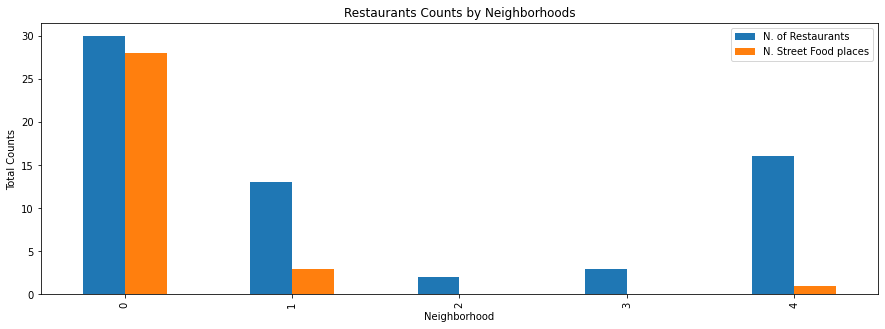

In [32]:
df_raw[['N. of Restaurants','N. Street Food places']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurants Counts by Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Total Counts')
plt.show()

In [33]:
data_frames = [dataframe_filtered, dataframe_filtered1,dataframe_filtered2,dataframe_filtered3,dataframe_filtered4]
data_frames
from functools import reduce
merged_df = pd.concat([dataframe_filtered, dataframe_filtered1,dataframe_filtered2,dataframe_filtered3,dataframe_filtered4])
merged_df

merged_df.columns
dummy_variable_1 = pd.get_dummies(merged_df["categories"])
dummy_variable_1



,American Restaurant,Bistro,Building,Chinese Restaurant,Food Court,Ice Cream Shop,Italian Restaurant,Mediterranean Restaurant,Pizza Place,Restaurant,Seafood Restaurant,Tuscan Restaurant
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:

print('Italian Restaurants represents by far the majority of the categories of restaurants in the 5 Neighborhoods')
df_rest_counts = merged_df.groupby(['categories']).count()
df_rest_counts


Italian Restaurants represents by far the majority of the categories of restaurants in the 5 Neighborhoods


,name,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
categories,,,,,,,,,,,,,,,
American Restaurant,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
Bistro,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
Building,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Chinese Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Food Court,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Ice Cream Shop,1,0,1,1,1,1,0,1,0,0,1,1,0,0,1
Italian Restaurant,33,26,33,33,33,33,20,33,27,27,33,33,6,0,33
Mediterranean Restaurant,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1
Pizza Place,12,7,12,12,12,12,7,12,10,10,12,12,1,1,12


## Observations

### Following the Foursquare API analysis it is possible to observe that:

-  The first Neighborhood *Centro Storico* has the highest concentration of Italian restaurants of Florence (19), with 8 additional restaurants associated with pizza and/or typical Italian food

-  The second Neighborhood *Campo di Marte* has a diversified network of restaurants with 4 Italian r., 6 restaurants associated with pizza and/or typical Italian food and 2 Seafood restaurants

-  The third Neighborhood *Gavinana-Galluzzo* has only 2 Italian restuarants

-  The fourth Neighborhood *Isolotto-Legnaia* has 1 American restaurant, 1 Bistro and 1 Italian restaurant

-  The fifth Neighborhood *Rifredi* has a diversified network of restaurants with 7 Italian r., 8 restaurants associated with pizza and/or typical Italian food and 1 Mediterrean restaurant

In [35]:
source = 'https://www.firenzetoday.it/guida/casa/prezzo-case-vendita-citta-quartiere.html'
firenzetoday_page = requests.get(source)
df_rent = pd.read_html(firenzetoday_page.content, header=0)[0]
df_rent

,Zone,Vendita (€/m²),Affitto (€/m²)
0,Centro,4.918,1804
1,Oltrarno,5.216,1845
2,"Campo di Marte, Libertà",4.332,1593
3,"Coverciano, Bellariva",3.877,1267
4,"Leopoldo, Porta al Prato",3.512,1417
5,Firenze Nord,3.045,1353
6,"Ugnano, Mantignano",3.058,873
7,L'Isolotto,3.258,1205
8,"Legnaia, Soffiano",3.429,1438
9,"Bellosguardo, Galluzzo",4.283,1541


In [36]:
import statistics
statistics.mean ([18.04,18.45,18.28]) # mean rent for Neighborhood 1

18.256666666666668

In [37]:
statistics.mean ([15.67,15.93,12.67,14.47]) # mean rent for Neighborhood 2

14.685

In [38]:
statistics.mean ([14.84,15.41]) # mean rent for Neighborhood 3

15.125

In [39]:
statistics.mean ([14.38,12.05,8.73]) # mean rent for Neighborhood 4

11.72

In [40]:
statistics.mean ([13.53,14.31,14.17]) # mean rent for Neighborhood 5

14.003333333333334

In [41]:
df_means = np.array([18.25,14.68,15.12,11.72,14.00])
df_means
df_raw['Average rent € m/2'] = df_means

df_raw


,Neighborhoods,Districts,Population,Latitude,Longitude,N. of Restaurants,N. Street Food places,Average rent € m/2
0,Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170,43.76941,11.25900,30,28,18.25
1,Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588,43.78149,11.28196,13,3,14.68
2,Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907,43.74656,11.25732,2,0,15.12
3,Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636,43.77399,11.19830,3,0,11.72
4,Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761,43.80260,11.21329,16,1,14.00


In [45]:
df_distance=np.array([0,2.6,3.4,5.4,6.2])
df_distance
df_raw['Distance from the Center of Florence (km)'] = df_distance
df_raw


writer = pd.ExcelWriter('df_raw.xlsx', engine='xlsxwriter')
df_raw.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']

chart = workbook.add_chart({'type': 'column'})

df_raw

,Neighborhoods,Districts,Population,Latitude,Longitude,N. of Restaurants,N. Street Food places,Average rent € m/2,Distance from the Center of Florence (km)
0,Centro Storico,Centro Storico · Il Prato · Fortezza da Basso ...,67.170,43.76941,11.25900,30,28,18.25,0.0
1,Campo di Marte,Campo di Marte · Le Cure · Viali · Bellariva ·...,88.588,43.78149,11.28196,13,3,14.68,2.6
2,Gavinana-Galluzzo,Gavinana · Galluzzo · San Gaggio · Collina sud...,40.907,43.74656,11.25732,2,0,15.12,3.4
3,Isolotto-Legnaia,Isolotto · Legnaia · Argingrosso · Cintoia · I...,66.636,43.77399,11.19830,3,0,11.72,5.4
4,Rifredi,Statuto · Romito · Viali · Fortezza da Basso ·...,103.761,43.80260,11.21329,16,1,14.00,6.2


In [43]:
tot_rest = (df_raw['N. of Restaurants'] - df_raw['N. of Restaurants'].min()) / (df_raw['N. of Restaurants'].max() - df_raw['N. of Restaurants'].min())

tot_sf = (df_raw['N. Street Food places'] - df_raw['N. Street Food places'].min()) / (df_raw['N. Street Food places'].max() - df_raw['N. Street Food places'].min())


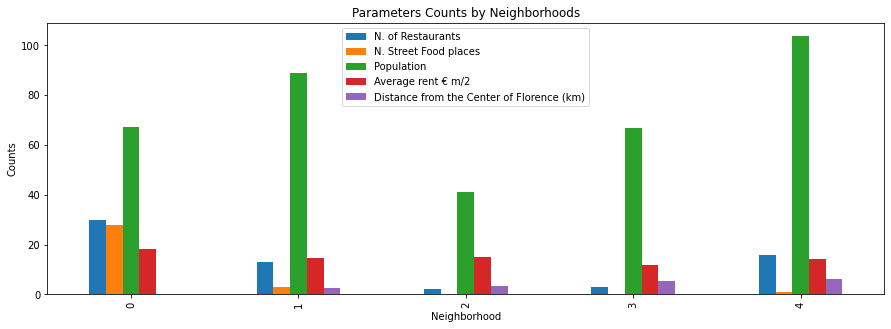

In [70]:
df_raw[['N. of Restaurants','N. Street Food places','Population', 'Average rent € m/2', 'Distance from the Center of Florence (km)']].plot(kind='bar',figsize=(15,5))
plt.title('Parameters Counts by Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Counts')
plt.show()

